## Forex CNY - RUB

In [ ]:
!pip install alpha_vantage
!pip install --upgrade statsmodels
!pip install prophet

     |████████████████████████████████| 1.1 MB 10.5 MB/s 
     |████████████████████████████████| 271 kB 70.2 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 144 kB 50.6 MB/s 
     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640817 sha256=ef0368bdb45b3af9fea63db684aeb4523d9d585e1a2613e6d837719794e45cc0
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## The google drive mounting is for using local **library**

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# Insert the directory to syspath
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
from time_series_utils import timeseries_evaluation_metrics_func, timeseries_RMSE_calc, \
                          create_proph_train_test, find_best_Prophet_model, \
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model

## Forex CNY RUB Time Series

In [ ]:
api_key = None
try:
  with open('drive/MyDrive/ALPHAVANTAGE_API_KEY.txt') as f:
      api_key = f.readline()
except:
    with open('ALPHAVANTAGE_API_KEY.txt') as f:
      api_key = f.readline()

In [ ]:
cc = ForeignExchange(key=api_key)

In [ ]:
data, _ = cc.get_currency_exchange_daily('CNY', 'RUB', outputsize='full')

In [ ]:
df = pd.DataFrame(data).transpose()
df.columns = ['open', 'high', 'low', 'close']

In [ ]:
df.shape

(1935, 4)

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close'], dtype='object')

In [ ]:
df.head(), df.tail()

(                open      high       low     close
 2022-04-25  11.89530  11.95020  11.23770  11.28990
 2022-04-22  12.37040  12.53910  11.75380  11.87480
 2022-04-21  12.88580  12.88580  12.29460  12.55000
 2022-04-20  12.66410  13.17230  12.47590  12.88600
 2022-04-19  12.72130  12.77040  12.37240  12.62500,
                open     high      low    close
 2014-11-28  7.90970  8.20860  7.89940  8.17980
 2014-11-27  7.66500  7.99430  7.62520  7.97980
 2014-11-26  7.54140  7.72020  7.49720  7.66500
 2014-11-25  7.31300  7.54360  7.28120  7.54350
 2014-11-24  7.48030  7.48030  7.23860  7.31300)

In [ ]:
# The dataframe is desendent we need to reverse it
df = df[::-1]
df.head(), df.tail()

(               open     high      low    close
 2014-11-24  7.48030  7.48030  7.23860  7.31300
 2014-11-25  7.31300  7.54360  7.28120  7.54350
 2014-11-26  7.54140  7.72020  7.49720  7.66500
 2014-11-27  7.66500  7.99430  7.62520  7.97980
 2014-11-28  7.90970  8.20860  7.89940  8.17980,
                 open      high       low     close
 2022-04-19  12.72130  12.77040  12.37240  12.62500
 2022-04-20  12.66410  13.17230  12.47590  12.88600
 2022-04-21  12.88580  12.88580  12.29460  12.55000
 2022-04-22  12.37040  12.53910  11.75380  11.87480
 2022-04-25  11.89530  11.95020  11.23770  11.28990)

In [ ]:
df = df.reset_index().rename(columns={'index': 'Date'})
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df = df.asfreq('B') # business day / working day 

In [ ]:
df

open      high       low     close
Date                                              
2014-11-24   7.48030   7.48030   7.23860   7.31300
2014-11-25   7.31300   7.54360   7.28120   7.54350
2014-11-26   7.54140   7.72020   7.49720   7.66500
2014-11-27   7.66500   7.99430   7.62520   7.97980
2014-11-28   7.90970   8.20860   7.89940   8.17980
...              ...       ...       ...       ...
2022-04-19  12.72130  12.77040  12.37240  12.62500
2022-04-20  12.66410  13.17230  12.47590  12.88600
2022-04-21  12.88580  12.88580  12.29460  12.55000
2022-04-22  12.37040  12.53910  11.75380  11.87480
2022-04-25  11.89530  11.95020  11.23770  11.28990

[1936 rows x 4 columns]

In [ ]:
df = df[['close']]
df.columns = ['CNY/RUB']

In [ ]:
df['CNY/RUB'] = df['CNY/RUB'].astype('float')
df.dtypes

CNY/RUB    float64
dtype: object

In [ ]:
# change to weekly cumulative 
dfw = df.resample('W').sum()

In [ ]:
dfw.head()

CNY/RUB
Date               
2014-11-30  38.6811
2014-12-07  43.2048
2014-12-14  44.6943
2014-12-21  50.0169
2014-12-28  43.3334

In [ ]:
dfw.index

DatetimeIndex(['2014-11-30', '2014-12-07', '2014-12-14', '2014-12-21',
               '2014-12-28', '2015-01-04', '2015-01-11', '2015-01-18',
               '2015-01-25', '2015-02-01',
               ...
               '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
               '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17',
               '2022-04-24', '2022-05-01'],
              dtype='datetime64[ns]', name='Date', length=388, freq='W-SUN')

In [ ]:
dfw.head()

CNY/RUB
Date               
2014-11-30  38.6811
2014-12-07  43.2048
2014-12-14  44.6943
2014-12-21  50.0169
2014-12-28  43.3334

In [ ]:
dfw.tail()

CNY/RUB
Date               
2022-04-03  68.0456
2022-04-10  64.3849
2022-04-17  64.9807
2022-04-24  62.6591
2022-05-01  11.2899

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2022,2,28)
test_dataset_end = datetime(2022,4,8)

In [ ]:
train_data = dfw[:train_dataset_end]
test_data = dfw[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
test_data.tail()

CNY/RUB
Date                
2022-03-06   87.3065
2022-03-13  106.8050
2022-03-20   83.8385
2022-03-27   80.6232
2022-04-03   68.0456

In [ ]:
test_data.shape

(5, 1)

In [ ]:
train_data.head()

CNY/RUB
Date               
2014-11-30  38.6811
2014-12-07  43.2048
2014-12-14  44.6943
2014-12-21  50.0169
2014-12-28  43.3334

In [ ]:
dfw['CNY/RUB'].plot(figsize=(16,8))

In [ ]:
# Value Columns to be used in all models tuning
val_col = 'CNY/RUB'

In [ ]:
# freq and date_col for Prophet
ph_freq='W' # weekly cumulative
ph_date_col='Date'

## Holt Winters Exponential Smoothing (ETS)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
best_ETS_model, best_RMSE, best_ETS_params = find_best_ETS_model(train_data, test_data,\
                                                                 val_col=val_col, seasonal_periods=[13,52])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [ ]:
best_RMSE, best_ETS_params

(24.805195629289507, ('mul', 'add', 52))

24.805195629289507, ('mul', 'add', 52)

In [ ]:
test_pred_ETS = best_ETS_model.forecast(len(test_data))
test_pred_ETS

2022-03-06    63.827843
2022-03-13    64.064712
2022-03-20    63.766825
2022-03-27    64.003845
2022-04-03    63.637206
Freq: W-SUN, dtype: float64

In [ ]:
test_data['Predicted_ETS'] = test_pred_ETS

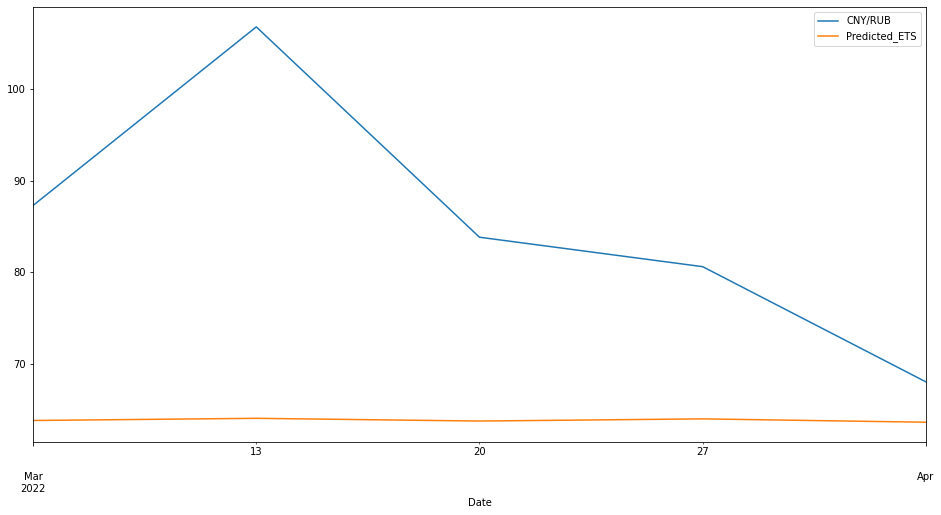

In [ ]:
test_data[[val_col, 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA model

In [ ]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
best_ARIMA_model, best_RMSE, best_pdq = find_best_ARIMA_model(train_data, test_data, val_col=val_col, p=range(0,9),\
                                                              d=range(1,3), q=range(0,9))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

In [ ]:
best_pdq, best_RMSE

((12, 1, 11), 24.281667340710236)

In [ ]:
test_pred_arima = best_ARIMA_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_ARIMA'] = test_pred_arima

In [ ]:
test_data[[val_col, 'Predicted_ARIMA']].plot(figsize=(16,8))

### SARIMA Model

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# we get best pdq from ARIMA (=best_pdq) and seaonal_period from ETS best params
seasonal_period = best_ETS_params[2]

In [ ]:
best_SARIMAX_model, best_RMSE, best_PDQS = find_best_SARIMAX_model(train_data, test_data, best_pdq, \
                                                                  val_col=val_col, season_period=seasonal_period)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
test_pred_SARIMAX = best_SARIMAX_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_SARIMAX'] = test_pred_SARIMAX

In [ ]:
test_data[[val_col, 'Predicted_SARIMAX']].plot(figsize=(16,8))

### Prophet

In [ ]:
from prophet import Prophet

In [ ]:
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col=ph_date_col, val_col=val_col)

In [ ]:
best_Prophet_model, best_RMSE, best_Prophet_params = find_best_Prophet_model(
    proph_train, proph_test, test_data, val_col=val_col,freq=ph_freq,\
    n_changepoints=[25, 50, 100])

In [ ]:
best_Prophet_params, best_RMSE

(('linear', 50, 'multiplicative', 10), 27.10691256036059)

In [ ]:
future = best_Prophet_model.make_future_dataframe(periods=len(proph_test), freq=ph_freq)
forecast = best_Prophet_model.predict(future)

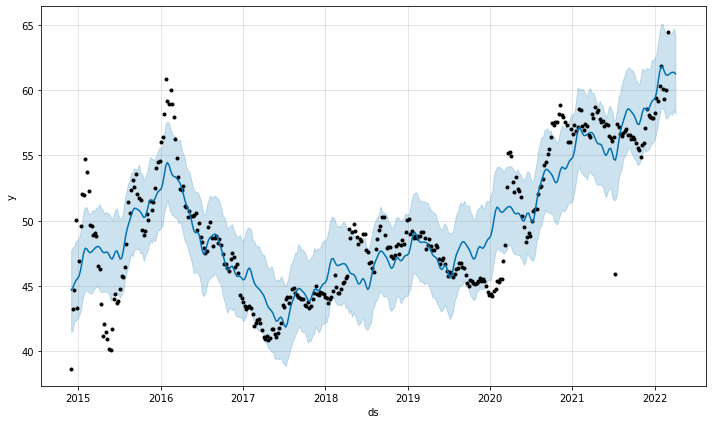

In [ ]:
fig1 = best_Prophet_model.plot(forecast)

In [ ]:
fig2 = best_Prophet_model.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

In [ ]:
test_data[[val_col, 'Predicted_Prophet']].plot(figsize=(16,8))

### Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 615.2977302073232
Mean Absolute Error is : 21.46367403865428
Root Mean Square Error is : 24.805195629289507
Mean Absolute Percentage Error is : 23.588485434541596
R2 score is : -2.9031282661825473



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 589.5993688449141
Mean Absolute Error is : 20.89655381222553
Root Mean Square Error is : 24.281667340710236
Mean Absolute Percentage Error is : 22.923596451700096
R2 score is : -2.7401112490477777



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 589.5993688449141
Mean Absolute Error is : 20.89655381222553
Root Mean Square Error is : 24.281667340710236
Mean Absolute Percentage Error is : 22.923596451700096
R2 score is : -2.7401112490477777



In [ ]:
timeseries_evaluation_metrics_func(test_data['CNY/RUB'], test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 734.7847085550347
Mean Absolute Error is : 24.027416565959594
Root Mean Square Error is : 27.10691256036059
Mean Absolute Percentage Error is : 26.637525688252637
R2 score is : -3.6610914110694166



### Conclusion: 

Based on the MSE and MAE values, the ARIMA/SARIMAX model provide the best prediction. But the R2 score for all predictions are negative so the predictions are not so reliable. 

Ranking for the models: ARIMA/SARIMAX, ETS, Prophet